You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [11]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


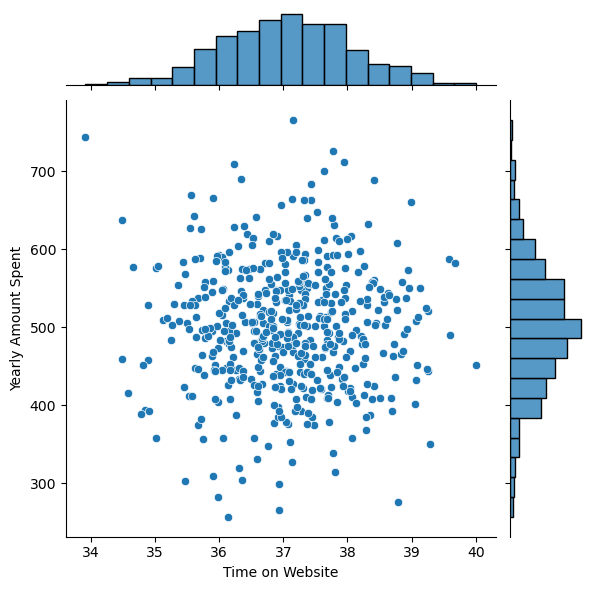

In [12]:
sns.jointplot(data= df , x = 'Time on Website', y = 'Yearly Amount Spent')

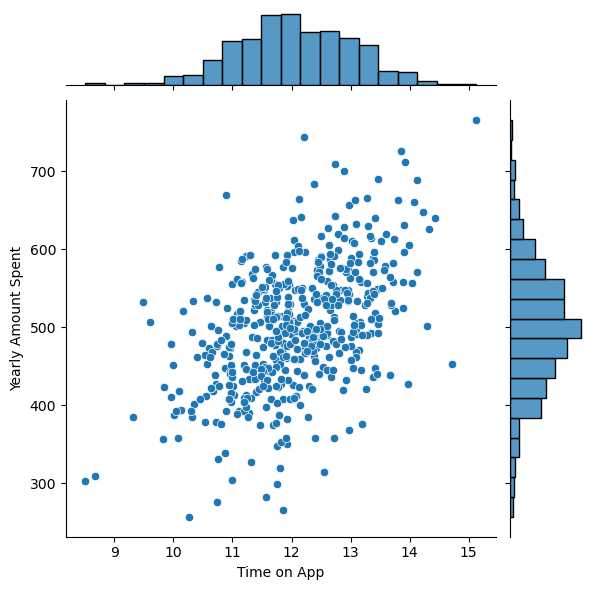

In [13]:
sns.jointplot(data= df , x = 'Time on App', y = 'Yearly Amount Spent')

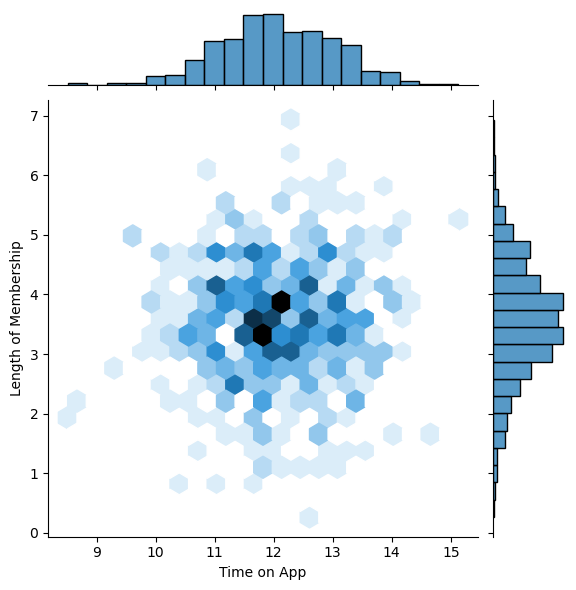

In [14]:
sns.jointplot(data = df ,x= 'Time on App' , y = 'Length of Membership', kind= 'hex')

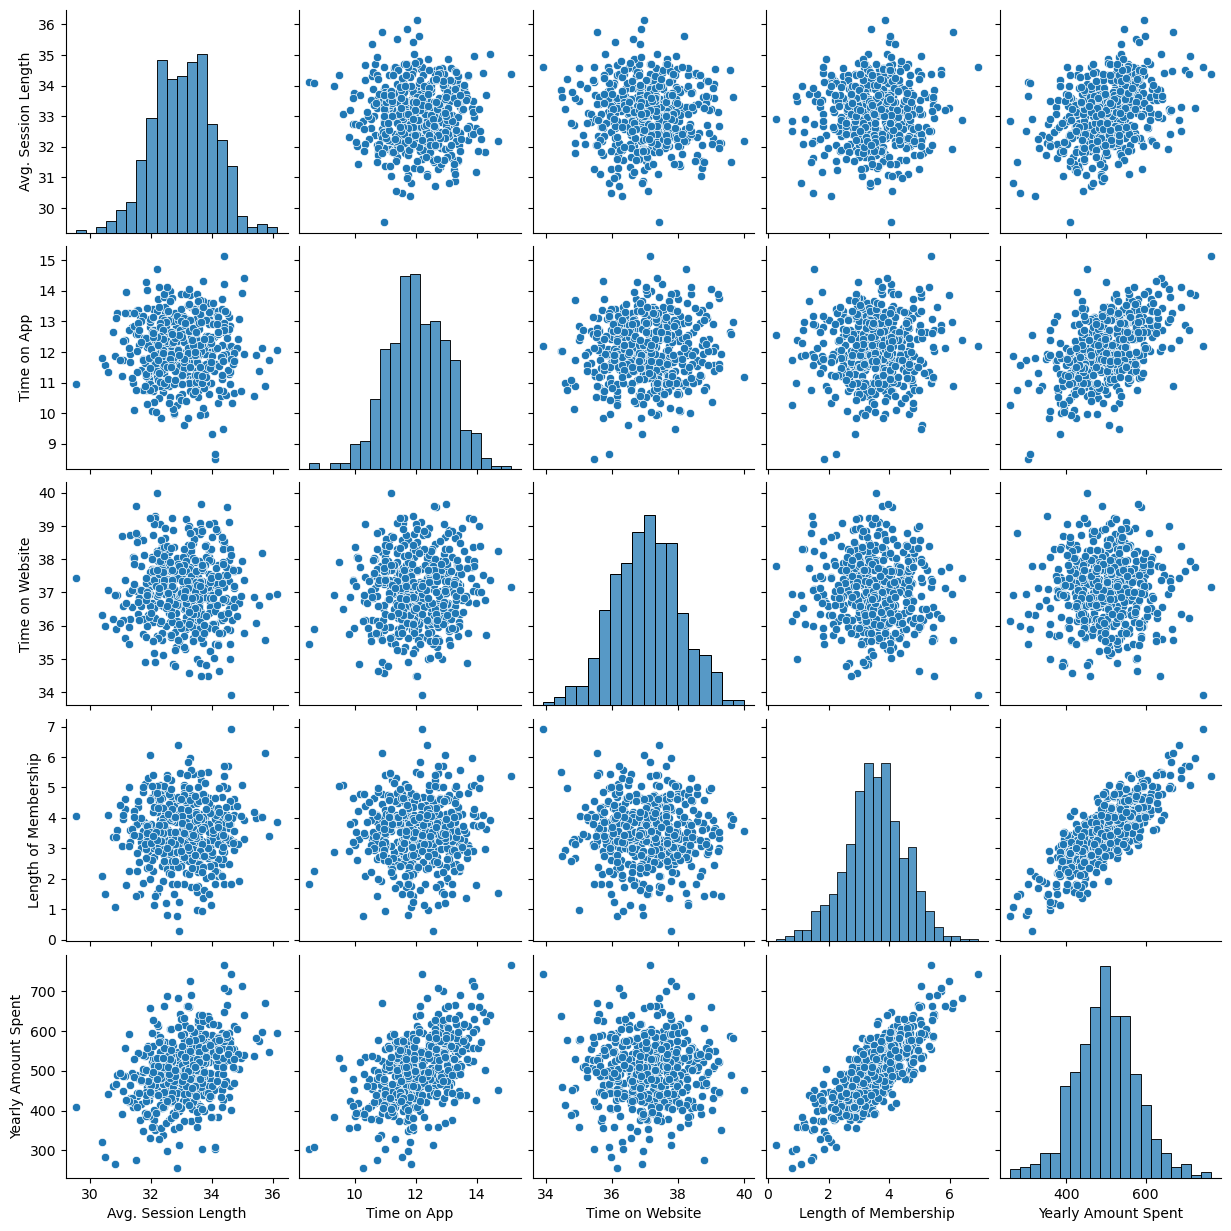

In [15]:
sns.pairplot(df)

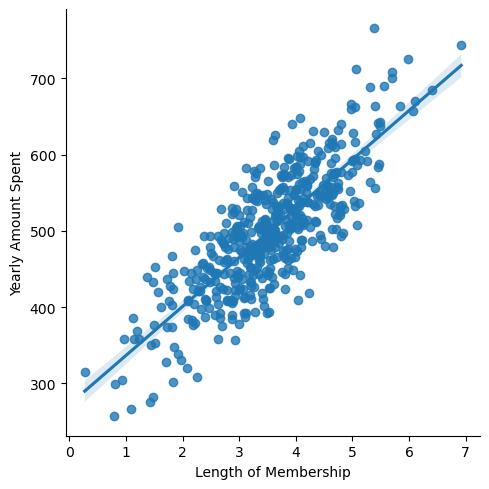

In [16]:
sns.lmplot(x = 'Length of Membership', y='Yearly Amount Spent' , data = df)

In [17]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [36]:
y = df['Yearly Amount Spent']
X = df[[ 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [37]:
print(X.head())

   Avg. Session Length  Time on App  Time on Website  Length of Membership
0            34.497268    12.655651        39.577668              4.082621
1            31.926272    11.109461        37.268959              2.664034
2            33.000915    11.330278        37.110597              4.104543
3            34.305557    13.717514        36.721283              3.120179
4            33.330673    12.795189        37.536653              4.446308


In [27]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()

In [40]:
lm.fit(X_train,y_train)


LinearRegression()

In [41]:
lm.intercept_

np.float64(-1047.932782250239)

In [42]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [43]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted values by the mode')

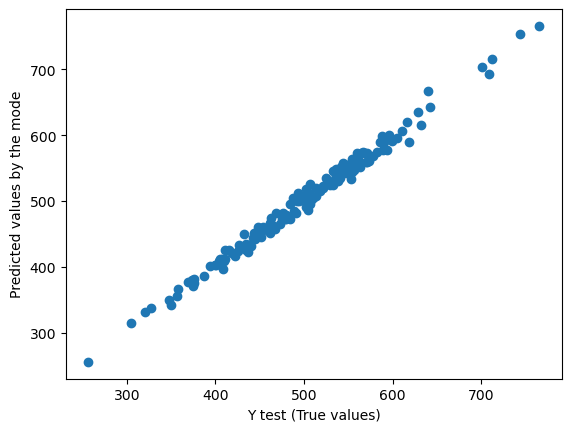

In [45]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test (True values)')
plt.ylabel('Predicted values by the mode')

In [46]:
from sklearn import metrics

In [47]:
print ('MAE' , metrics.mean_absolute_error(y_test,predictions))

MAE 7.228148653430845


In [48]:
print ('MSE' , metrics.mean_squared_error(y_test,predictions))

MSE 79.81305165097454


In [49]:
print ('RMSE' , np.sqrt(metrics.mean_squared_error(y_test,predictions)))

RMSE 8.933815066978639


In [50]:
metrics.explained_variance_score(y_test,predictions)

0.9890771231889607

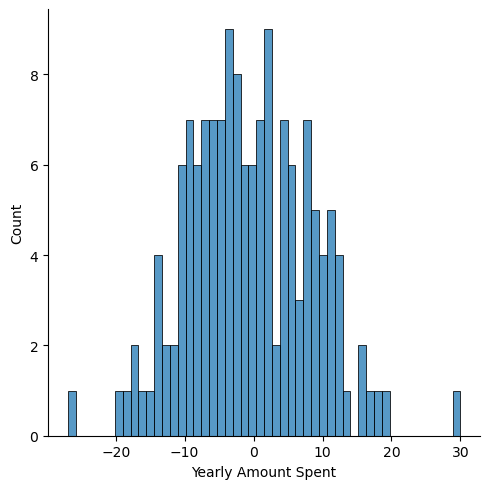

In [51]:
sns.displot(y_test-predictions,bins =50)

In [52]:
pd.DataFrame(lm.coef_,X.columns, columns= ['Coef'])

,Coef
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


so we can conclude that the company should  focus on Time for app, as people tend to spend more as the use app more